\title{Bayesian Inference}  
\author{Nicolai Haug}  
\maketitle  

\section{Introduction}

Mechanistic models in neuroscience aim to explain neural or behavioral phenomena in terms of causal mechanisms, and candidate models are validated by investigating whether proposed mechanisms can explain how experimental data manifests. A central challenge in building a mechanistic model is to identify the parametrization of the system which achieves an agreement between the model and experimental data.

Statistical inference provides the mathematical means and procedures for automated parameter identification. Statistical inference uses the likelihood $p(\bm{x} \mid \bm{\theta})$ to quantify the match between parameters $\bm{\theta}$ and data $\bm{x}$ by deriving estimators of $\bm{\theta}$ from the data. In Bayesian inference, posterior beliefs about parameters $\bm{\theta}$ given data $\bm{x}$, $p(\bm{\theta} \mid \bm{x})$, can be obtained by multiplying the likelihood $p(\bm{x} \mid \bm{\theta})$ with prior beliefs $p(\bm{\theta})$ and normalizing \cite{SNL18}.


Bayesian inference is therefore just the process of deducing properties about a population or probability distribution from data using Bayes' theorem.

Bayesian Inference

Logistic regression can be used to classify instances into different classes by modelling the probability of a certain class or event existing e.g. win/lose, 1/0 etc. In this notebook we take a look at the fundamentals behind logistic regression.

## Configure Notebook

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import sys

import matplotlib.pyplot as plt
import numba
import numpy as np
import pandas as pd
from scipy.stats import norm, invgamma, gaussian_kde

from latex_envs.latex_envs import figcaption 

from IPython.display import display
import warnings
# Comment this to turn on warnings
warnings.filterwarnings('ignore')

#plt.style.use('seaborn')
# Set fontsizes in figures
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'legend.fontsize': 'large',
          'legend.handlelength': 2}
plt.rcParams.update(params)

\section{The Bayesian Paradigm}

\subsection{Notation}

At the outset, a few comments on notation: First, $p(\cdot \mid \cdot)$ denotes a \textit{conditional probability density} and $p(\cdot)$ denotes a \textit{marginal distribution}. The conditional probability $p(A \mid B)$ is the likelihood of event $A$ occurring given that $B$ is true, and the marginal probability $p(A)$ is the probability of observing $A$. The terms \textit{distribution} and \textit{density} are used interchangeably. For brevity, the term \textit{probability density} will often be condensed into the term \textit{density}. A \textit{probability mass function}, that gives the probability that a discrete random variable is exactly equal to some value, is abbreviated \textit{pmf}. Similarly, a \textit{probability density function}, associated with continuous rather than discrete random variables, is abbreviated \textit{pdf}. The same notation is used for continuous density functions and discrete probability mass functions.

\subsection{Bayesian Inference}

In statistical inference, there are, broadly speaking, two paradigms for the analysis of sampled data: frequentist inference and Bayesian inference. They often differ with each other in their fundamental interpretation of probability. In terms of parameter inference, the standard frequentist view is to regard the value of some parameter $\theta$ as fixed but unknown, and draw appropriate conclusions from sample data $\mathbf{x}$ by emphasizing the relative frequency of the data. The Bayesian approach to inference is to regard $\theta$ as a random variable having a \textit{prior probability distribution}, usually a prior pdf $p(\theta)$ since there will typically be a continuum of possible values of a parameter rather than just a discrete set, that incorporates all available information about it \cite[p. 758, 776]{stk_bok}. In the case of substantial prior knowledge about a parameter $\theta$, the prior pdf is narrow and concentrated about some central value, whereas a lack of information yield a wider and relatively flat prior pdf as shown in


### Bayes' Theorem 

\begin{equation}
    \pi \left( \theta | y\right) = \frac{p \left(y | \theta \right) \pi \left(\theta \right)}{\int_\Theta p \left(y | \theta \right) \pi \left(\theta \right) \mathrm{d} \theta}
\end{equation}



### Conjugate Prior Distributions 

Conjugacy is formally defined as follows \cite{abc_handbook}. If $\mathcal{F}$ is a class of sampling distributions $p \left(y | \theta \right)$, and $\mathcal{P}$ is a class of prior distributions for $\theta$, then the class $\mathcal{P}$ is *conjugate* for $\mathcal{F}$ if

\begin{equation}
    \pi \left(\theta | y \right) \in \mathcal{P} \, \forall p \left(\cdot | \theta \right) \in \mathcal{F} \land \pi (\cdot) \in \mathcal{P}
\end{equation}

This definition is formally vague since if we choose $\mathcal{P}$ as the class of all distributions, then $\mathcal{P}$ is always conjugate no matter what class of sampling distributions is used. We are most interested in *natural* conjugate prior families, which arise by taking $\mathcal{P}$ to be the set of all densities having the same functional form as the likelihood \cite[p. 36]{abc_handbook}.

A conjugate prior of a likelihood is a prior that, when used in combination with a given likelihood, returns a posterior with the same functional form as the prior. cite BAP

## Multiparameter Models

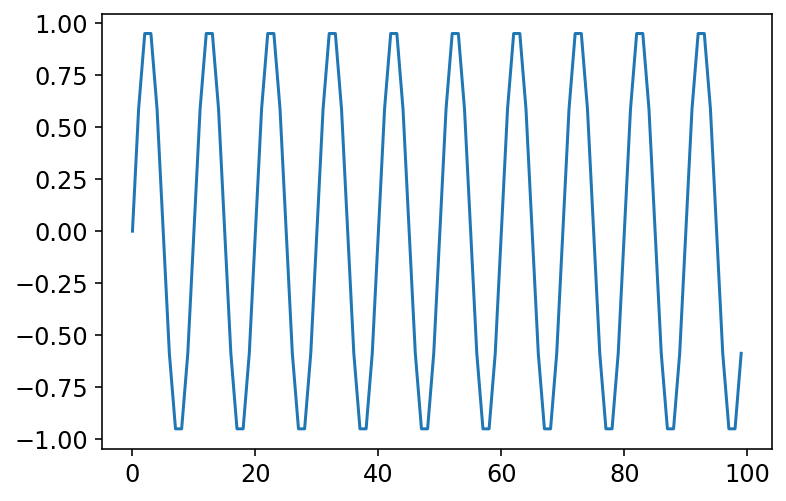

In [10]:
plt.plot(np.sin(2 * np.pi * 0.1 * np.arange(100)))
figcaption("This is a nice sine wave", label="fig:mysin")

# References